In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# Filters work by convolution with a moving window called a kernel.
#Convolution is nothing but multiplication of two arrays of different sizes. 
#The image will be of one size and the kernel with be of a different size, 
# #usually much smaller than image
# The input pixel is at the centre of the kernel. 
# The convolution is performed by sliding the kernel over the image, 
# $usually from top left of image.
# Linear filters and non-linear filters.
# Gaussian is an example of linear filter. 
#Non-linear filters preserve edges. 
#Median filter is an example of non-linear filter. 
#The algorithm selects the median value of all the pixels in the selected window

In [11]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np


In [12]:
img = img_as_float(io.imread("/content/gdrive/My Drive/CVG/noisy_img.jpg"))
#Need to convert to float as we will be doing math on the array


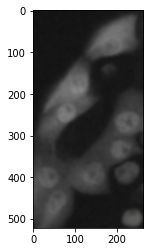

In [13]:
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow( gaussian_img)

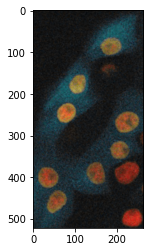

In [14]:
median_img = nd.median_filter(img, size=3)
plt.imshow( median_img)


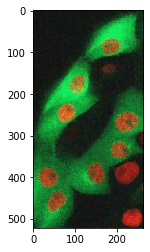

In [15]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))

patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=True)
"""
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)
"""
denoise_img_as_8byte = img_as_ubyte(denoise_img)

plt.imshow(denoise_img)
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')